In [614]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
from sklearn.model_selection import train_test_split

In [615]:
training_file="/content/1646102559_507402_train35.txt"


In [616]:
data = pd.read_table(training_file,names=["Total_Data"])
df = data['Total_Data'].str.split(',',expand=True)
df=df.rename(columns = {0:'Digit'})
df['Label'] = df['Digit'].replace(to_replace = ['5','3'], value=[1,-1])
example = df.drop('Digit', axis = 1)

In [617]:
X_train, X_test, y_train, y_test = train_test_split(example.iloc[0:len(example),0:256], example.iloc[0:len(example),256], test_size=0.25)


In [618]:
Tr_Test=X_test.to_numpy()
Tr_Test = Tr_Test[0:len(X_test),0:256]
Tr_Test=Tr_Test.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [619]:
X_train['Label']=y_train

In [620]:
Train=X_train

In [622]:
def adaboost_sk(X,k):
  alphas = []
  G_M = []
  error=[]
  example['weight'] = 1/(example.shape[0])
  train_error=[]
  for i in range(k):
    random.seed(10*i)
    example1 = example.sample(len(example), replace = True, weights = example['weight'])
    X_i = example1.iloc[0:len(example),0:256]
    y_i = example1.iloc[0:len(example),256]
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
    clf = clf_gini.fit(X_i, y_i)
    y_pred = clf_gini.predict(example.iloc[0:len(X),0:256])
    G_M.append(clf)
    example['pred'] = y_pred
    example.loc[example.Label != example.pred, 'misclassified'] = 1
    example.loc[example.Label == example.pred, 'misclassified'] = 0
    e1 = sum(example['misclassified'] * example['weight'])
    if e1>0.5:
      example['weight'] = 1/(example.shape[0])
      break
    error.append(e1)
    alpha1 = 0.5*log((1-e1)/e1)
    alphas.append(alpha1)
    new_weight = example['weight']*np.exp(-1*alpha1*example['Label']*example['pred'])
    z = sum(new_weight)
    normalized_weight = new_weight/sum(new_weight)
    example['weight'] = round(normalized_weight,4)
    tr_pr=predict_sk(X_test,G_M,alphas,i)
    train_error.append(tr_pr)
  return e1,alphas,G_M,train_error

In [623]:
# e1,alphas,G_M,train_error=adaboost_sk(example,200)
# print(alphas)

In [639]:
def adaboost(D,k):
  alphas = []
  C = []
  error=[]
  D['weight'] = 1/(D.shape[0])
  D_test=D.to_numpy()
  D_test = D_test[0:len(D_test),0:256]
  D_test=D_test.astype(np.float)
  e_i=0
  train_error=[]
  for i in range(k):
    if e_i<0.5:
      random.seed(10*i)
      D_i = D.sample(len(D), replace = True, weights = D['weight'])
      ex=D_i.to_numpy()
      X = ex[0:len(D),0:256]
      X=X.astype(np.float)
      X=np.array(X)
      y= ex[0:len(D),256]
      y=y.astype(np.int)
      y=np.array(y)
      tree =DecisionTree(1)
      tree.fit(X, y)
      y_pred=tree.classify(D_test)
      C.append(tree)
      D['pred'] = y_pred
      D.loc[D.Label != D.pred, 'misclassified'] = 1
      D.loc[D.Label == D.pred, 'misclassified'] = 0
      e_i = sum(D['misclassified'] * D['weight'])
      error.append(e_i)
      alpha_i = 0.5*log((1-e_i)/e_i)
      alphas.append(alpha_i)
      new_weight = D['weight']*np.exp(-1*alpha_i*D['Label']*D['pred'])
      z = sum(new_weight)
      normalized_weight = new_weight/sum(new_weight)
      D['weight'] = round(normalized_weight,4)
    else:
      D['weight'] = 1/(D.shape[0])
      random.seed(10*i)
      D_i = D.sample(len(D), replace = True, weights = D['weight'])
      ex=D_i.to_numpy()
      X = ex[0:len(D),0:256]
      X=X.astype(np.float)
      X=np.array(X)
      y= ex[0:len(D),256]
      y=y.astype(np.int)
      y=np.array(y)
      tree =DecisionTree(1)
      tree.fit(X, y)
      y_pred=tree.classify(D_test)
      C.append(tree)
      D['pred'] = y_pred
      D.loc[D.Label != D.pred, 'misclassified'] = 1
      D.loc[D.Label == D.pred, 'misclassified'] = 0
      e_i = sum(D['misclassified'] * D['weight'])
      error.append(e_i)
      alpha_i = 0.5*log((1-e_i)/e_i)
      alphas.append(alpha_i)
      new_weight = D['weight']*np.exp(-1*alpha_i*D['Label']*D['pred'])
      z = sum(new_weight)
      normalized_weight = new_weight/sum(new_weight)
      D['weight'] = round(normalized_weight,4)
    prediction,tr_pr=predict(Tr_Test,C,alphas,i)
    train_error.append(tr_pr)
  return alphas,C,train_error,k,error

In [640]:
aplh,clas,train_error,itr,error=adaboost(Train,200)

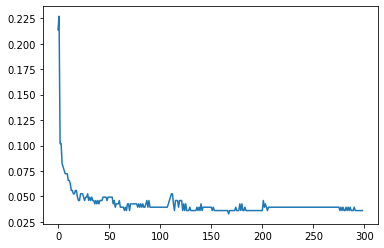

In [629]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot( range(len(train_error)-1),train_error[1:300])

In [630]:
# itre=[20,40,60,80,100,120,140,160,180,200]
# test_errors=[0.11,0.09,0.08,0.09,0.08,0.09,0.08,0.08,0.08,0.07]

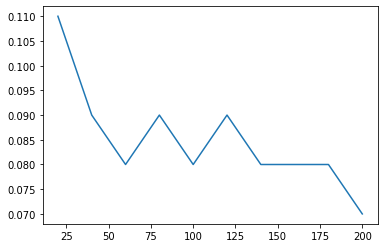

In [631]:
# plt.plot( itre,test_errors)

In [ ]:
from collections import Counter
import numpy as np
class DecisionNode:
    def __init__(self, left, right, decision_function, class_label=None):
        self.left = left
        self.right = right
        self.decision_function = decision_function
        self.class_label = class_label
    def decide(self, feature):
        if self.class_label is not None:
            return self.class_label
        elif self.decision_function(feature):
            return self.left.decide(feature)
        else:
            return self.right.decide(feature)
def gini_impurity(class_vector):
    counts = Counter(class_vector)
    prob_zero = counts[0] / len(class_vector)
    prob_one = counts[1] / len(class_vector)
    prob_sum = prob_zero ** 2 + prob_one ** 2
    return 1 - prob_sum
def gini_gain(previous_classes, current_classes):
    previous_gini_gain = gini_impurity(previous_classes)
    current_gini_gain = 0
    previous_len = len(previous_classes)
    if len(current_classes[0]) == 0 or len(current_classes[1]) == 0:
        return 0
    for ll in current_classes:
        current_length = len(ll)
        current_gini_gain += gini_impurity(ll) * float(current_length) / previous_len
    return previous_gini_gain - current_gini_gain
class DecisionTree:
    def __init__(self, depth_limit=float('inf')):
        self.root = None
        self.depth_limit = depth_limit
    def fit(self, features, classes):
        self.root = self.__build_tree__(features, classes)
    def __build_tree__(self, features, classes, depth=0):
        best_info_gain = -1
        best_column_index = -1
        best_column_threshold = -1
        if len(classes) == 0:
            return None
        elif len(classes) == 1:
            return DecisionNode(None, None, None, classes[0])
        elif np.all(classes[0] == classes[:]):
            return DecisionNode(None, None, None, classes[0])
        elif depth == self.depth_limit:
            return DecisionNode(None, None, None, get_most_occurring_feature(classes))
        else:
            for column_i in range(features.shape[1]):
                column_values_for_column_i = features[:, column_i]
                column_mean = np.mean(column_values_for_column_i)
                classes_new = []
                temp_X_left, temp_X_right, temp_y_left, temp_y_right = partition_classes(features, classes, column_i, column_mean)
                classes_new.append(temp_y_left)
                classes_new.append(temp_y_right)
                column_i_information_gain = gini_gain(classes, classes_new)
                if column_i_information_gain > best_info_gain:
                    best_info_gain = column_i_information_gain
                    best_column_index = column_i
                    best_column_threshold = column_mean
            X_left, X_right, y_left, y_right = partition_classes(features, classes, best_column_index,best_column_threshold)
            depth += 1
            left_tree = self.__build_tree__(np.array(X_left), np.array(y_left), depth)
            right_tree = self.__build_tree__(np.array(X_right), np.array(y_right), depth)
            return DecisionNode(left_tree, right_tree,lambda feature: feature[best_column_index] < best_column_threshold)
    def classify(self, features):
        class_labels = []
        for feature in features:
            tree = self.root
            class_labels.append(tree.decide(feature))
        return class_labels
def partition_classes(X, y, split_attribute, split_val):
    X_left = []
    X_right = []
    y_left = []
    y_right = []
    for i in range(len(X)):
        if float(X[i][split_attribute]) <= split_val:
            X_left.append(X[i])
            y_left.append(y[i])
        else:
            X_right.append(X[i])
            y_right.append(y[i])
    return X_left, X_right, y_left, y_right
def get_most_occurring_feature(classes):
    counter = Counter(classes)
    k, v = counter.most_common(1)[0]
    return k

In [632]:
def predict_sk(X,Cl,aplh,itr):
  weak_preds = pd.DataFrame(index = range(len(X)), columns = range(itr))
  for i in range(itr):
    y_pred_m = Cl[i].predict(X) * aplh[i]
    weak_preds.iloc[:,i] = y_pred_m
  y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)
  accuracy = 0
  for i in range(y_pred.size):
      if y_pred[i] == y_test.iloc[i]: 
          accuracy += 1
  acc = accuracy / y_pred.size

  return 1-acc

In [633]:
def predict(X,Cl,aplh,itr):
  y_Test=y_test.to_numpy()
  y_Test=y_Test.astype(np.float)
  weak_preds = pd.DataFrame(index = range(len(X)), columns = range(itr))
  for i in range(itr):
    gi=Cl[i].classify(X)
    gi=np.array(gi)
    y_pred_m = gi * aplh[i]
    weak_preds.iloc[:,i] = y_pred_m
  ypt = (1 * np.sign(weak_preds.T.sum())).astype(int)
  accuracy = 0
  for i in range(ypt.size):
      if ypt[i] == y_Test[i]: 
          accuracy += 1
  acc = accuracy / ypt.size
  return ypt,1-acc

In [634]:
test_file="/content/1646102559_513849_test35-nolabels.txt"
data_t = pd.read_table(test_file,names=["Total_Data"])
df_t = data_t['Total_Data'].str.split(',',expand=True)
df_t.shape

(326, 256)

In [635]:
def predict_test(X,Cl,aplh,itr):
  y_Test=y_test.to_numpy()
  y_Test=y_Test.astype(np.float)
  weak_preds = pd.DataFrame(index = range(len(X)), columns = range(itr))
  for i in range(itr):
    gi=Cl[i].classify(X)
    gi=np.array(gi)
    y_pred_m = gi * aplh[i]
    weak_preds.iloc[:,i] = y_pred_m
  ypt = (1 * np.sign(weak_preds.T.sum())).astype(int)
  return ypt

In [ ]:
df_t=df_t.to_numpy()
df_t=df_t.astype(np.float)

In [ ]:
final=predict_test(df_t,clas,aplh,itr)
final_lis = final.replace(to_replace = [1,-1], value=[5,3])

In [ ]:
for i in range(len(final_lis)):
  print(final_lis[i])

In [ ]:
# np.savetxt('/content/hw3_format.txt', final_lis.values)